In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
import statsmodels.api as sm

In [94]:
warnings.filterwarnings("ignore")

In [95]:
# Read in the country data as a raw github data file
df_data = pd.read_csv("https://raw.githubusercontent.com/j-chu33/Senior-Project-Winter-2023/main/country_time_gdp_co2.csv")

# Print sample data
df_data.head(10)

,Country Name,Country Code,Time,Time Code,GDP (current US$) [NY.GDP.MKTP.CD],CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC]
0,Afghanistan,AFG,1997.0,YR1997,NaN,0.061837
1,Afghanistan,AFG,1998.0,YR1998,NaN,0.056237
2,Afghanistan,AFG,1999.0,YR1999,NaN,0.042050
3,Afghanistan,AFG,2000.0,YR2000,NaN,0.038889
4,Afghanistan,AFG,2001.0,YR2001,NaN,0.037077
5,Afghanistan,AFG,2002.0,YR2002,3.854235e+09,0.049047
6,Afghanistan,AFG,2003.0,YR2003,4.539501e+09,0.053875
7,Afghanistan,AFG,2004.0,YR2004,5.220824e+09,0.043730
8,Afghanistan,AFG,2005.0,YR2005,6.226199e+09,0.063495
9,Afghanistan,AFG,2006.0,YR2006,6.971379e+09,0.069174


In [96]:
#Change the names of the columns to be more readible and understandable
df_data = df_data.rename(columns = {'Time':'Year',
                                    'GDP (current US$) [NY.GDP.MKTP.CD]':'GDP (Current US$)',
                                    'CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC]':'CO2 Emissions (Metric Tons per Capita)'})

# Convert data to float to allow for mathematical analysis
df_data['Year'] = df_data['Year'].astype('Int64')
df_data['GDP (Current US$)'] = df_data['GDP (Current US$)'].replace('NaN', np.nan)
df_data['GDP (Current US$)'] = df_data['GDP (Current US$)'].astype('float')
df_data['CO2 Emissions (Metric Tons per Capita)'] = df_data['CO2 Emissions (Metric Tons per Capita)'].replace('NaN', np.nan)
df_data['CO2 Emissions (Metric Tons per Capita)'] = df_data['CO2 Emissions (Metric Tons per Capita)'].astype('float')

# View the converted data
df_data.head(25)

,Country Name,Country Code,Year,Time Code,GDP (Current US$),CO2 Emissions (Metric Tons per Capita)
0,Afghanistan,AFG,1997,YR1997,NaN,0.061837
1,Afghanistan,AFG,1998,YR1998,NaN,0.056237
2,Afghanistan,AFG,1999,YR1999,NaN,0.042050
3,Afghanistan,AFG,2000,YR2000,NaN,0.038889
4,Afghanistan,AFG,2001,YR2001,NaN,0.037077
5,Afghanistan,AFG,2002,YR2002,3.854235e+09,0.049047
6,Afghanistan,AFG,2003,YR2003,4.539501e+09,0.053875
7,Afghanistan,AFG,2004,YR2004,5.220824e+09,0.043730
8,Afghanistan,AFG,2005,YR2005,6.226199e+09,0.063495
9,Afghanistan,AFG,2006,YR2006,6.971379e+09,0.069174


In [97]:
# Quick demographic calculations
df_data['Country Code'].nunique()

217

There are 217 countries included in this data set. However not all countries have data for the years between 1997 and 2021, so they will be removed.

In [98]:
# No countries have CO2 emissions data in 2020 or 2021, so those years will be removed from the analysis
df_data = df_data[(df_data.Year != 2020) & (df_data.Year != 2021)]

In [99]:
# Read in Human Development Index as of 2019
df_hdi = pd.read_csv('https://raw.githubusercontent.com/j-chu33/Senior-Project-Winter-2023/main/HDI%202019%20Final.csv')
df_hdi = df_hdi.iloc[:, [0, 1, 2]]
df_hdi = df_hdi.rename(columns = {'Human Development Index (HDI) ':'HDI'})
df_hdi.head()

,Country,Country Code,HDI
0,Afghanistan,AFG,0.488
1,Albania,ALB,0.810
2,Algeria,DZA,0.748
3,Andorra,AND,0.873
4,Angola,AGO,0.595


In [100]:
# Combine the GDP and CO2 dataset with HDI dataset
df_gdp_hdi = pd.merge(df_data, df_hdi, how = 'left', on='Country Code')

In [101]:
# Read in GDP Per Capita (in current US$)
df_gdppc = pd.read_csv('https://raw.githubusercontent.com/j-chu33/Senior-Project-Winter-2023/main/gdppc.csv')
df_gdppc = df_gdppc.iloc[:, [1, 3, 4]]
df_gdppc = df_gdppc.rename(columns = {'GDP per capita (current US$) [NY.GDP.PCAP.CD]':'GDP Per Capita'})

df_gdppc['GDP Per Capita'] = df_gdppc['GDP Per Capita'].replace('NaN', np.nan)
df_gdppc['GDP Per Capita'] = df_gdppc['GDP Per Capita'].astype('float')

df_gdppc.head(30)

,Country Code,Time Code,GDP Per Capita
0,AFG,YR1997,NaN
1,AFG,YR1998,NaN
2,AFG,YR1999,NaN
3,AFG,YR2000,NaN
4,AFG,YR2001,NaN
5,AFG,YR2002,183.532775
6,AFG,YR2003,200.462567
7,AFG,YR2004,221.657604
8,AFG,YR2005,255.055120
9,AFG,YR2006,274.000487


In [102]:
# Combine all 3 datasets
df_combined = pd.merge(df_gdp_hdi, df_gdppc, how = 'left', on=['Country Code', 'Time Code'])
df_combined.head(30)

,Country Name,Country Code,Year,Time Code,GDP (Current US$),CO2 Emissions (Metric Tons per Capita),Country,HDI,GDP Per Capita
0,Afghanistan,AFG,1997,YR1997,NaN,0.061837,Afghanistan,0.488,NaN
1,Afghanistan,AFG,1998,YR1998,NaN,0.056237,Afghanistan,0.488,NaN
2,Afghanistan,AFG,1999,YR1999,NaN,0.042050,Afghanistan,0.488,NaN
3,Afghanistan,AFG,2000,YR2000,NaN,0.038889,Afghanistan,0.488,NaN
4,Afghanistan,AFG,2001,YR2001,NaN,0.037077,Afghanistan,0.488,NaN
5,Afghanistan,AFG,2002,YR2002,3.854235e+09,0.049047,Afghanistan,0.488,183.532775
6,Afghanistan,AFG,2003,YR2003,4.539501e+09,0.053875,Afghanistan,0.488,200.462567
7,Afghanistan,AFG,2004,YR2004,5.220824e+09,0.043730,Afghanistan,0.488,221.657604
8,Afghanistan,AFG,2005,YR2005,6.226199e+09,0.063495,Afghanistan,0.488,255.055120
9,Afghanistan,AFG,2006,YR2006,6.971379e+09,0.069174,Afghanistan,0.488,274.000487


In [103]:
# Not all countries have GDP or CO2 data for the years between 1997 to 2019. Drop countries that do not have any data over the years 1997 to 2019.
null_countries = pd.DataFrame(df_combined[(df_combined['GDP Per Capita'].isna()) | (df_combined['CO2 Emissions (Metric Tons per Capita)'].isna())].groupby('Country Code').size())
null_countries.columns = ['na_counts']

null_countries = null_countries[null_countries.na_counts == 23]

drop_cnt = list(null_countries.index.values)

df_analysis = df_combined[~df_combined['Country Code'].isin(drop_cnt)]
df_analysis['Country Code'].nunique()

190

After removing countries that do not have any data over the 22 years, we are left with 190 countries. 

In [104]:
# Dataset to be used for analysis, graphs, and tables
df_analysis.head()

,Country Name,Country Code,Year,Time Code,GDP (Current US$),CO2 Emissions (Metric Tons per Capita),Country,HDI,GDP Per Capita
0,Afghanistan,AFG,1997,YR1997,NaN,0.061837,Afghanistan,0.488,NaN
1,Afghanistan,AFG,1998,YR1998,NaN,0.056237,Afghanistan,0.488,NaN
2,Afghanistan,AFG,1999,YR1999,NaN,0.042050,Afghanistan,0.488,NaN
3,Afghanistan,AFG,2000,YR2000,NaN,0.038889,Afghanistan,0.488,NaN
4,Afghanistan,AFG,2001,YR2001,NaN,0.037077,Afghanistan,0.488,NaN


Text(0, 0.5, 'CO2 Emissions (Metric tons per Capita)')

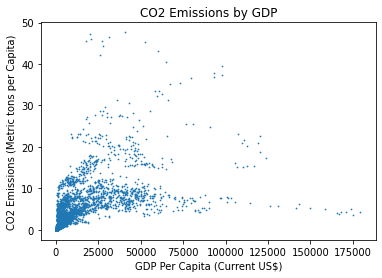

In [105]:
# Graph a scatterplot of GDP and CO2
plt.scatter(df_analysis['GDP Per Capita'], df_analysis['CO2 Emissions (Metric Tons per Capita)'], s = 0.5)
plt.title('CO2 Emissions by GDP')
plt.xlabel('GDP Per Capita (Current US$)')
plt.ylabel('CO2 Emissions (Metric tons per Capita)')

In [106]:
# Perform log transformation on GDP
df_analysis['Log(GDP)'] = np.log(df_analysis['GDP (Current US$)'])
df_analysis['Log(GDPPC)'] = np.log(df_analysis['GDP Per Capita'])
df_analysis

,Country Name,Country Code,Year,Time Code,GDP (Current US$),CO2 Emissions (Metric Tons per Capita),Country,HDI,GDP Per Capita,Log(GDP),Log(GDPPC)
0,Afghanistan,AFG,1997,YR1997,NaN,0.061837,Afghanistan,0.488,NaN,NaN,NaN
1,Afghanistan,AFG,1998,YR1998,NaN,0.056237,Afghanistan,0.488,NaN,NaN,NaN
2,Afghanistan,AFG,1999,YR1999,NaN,0.042050,Afghanistan,0.488,NaN,NaN,NaN
3,Afghanistan,AFG,2000,YR2000,NaN,0.038889,Afghanistan,0.488,NaN,NaN,NaN
4,Afghanistan,AFG,2001,YR2001,NaN,0.037077,Afghanistan,0.488,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4986,Zimbabwe,ZWE,2015,YR2015,1.996312e+10,0.878139,Zimbabwe,0.601,1410.329174,23.717152,7.251578
4987,Zimbabwe,ZWE,2016,YR2016,2.054868e+10,0.762487,Zimbabwe,0.601,1421.787789,23.746062,7.259670
4988,Zimbabwe,ZWE,2017,YR2017,1.758489e+10,0.700965,Zimbabwe,0.601,1192.107012,23.590306,7.083478
4989,Zimbabwe,ZWE,2018,YR2018,3.415607e+10,0.822472,Zimbabwe,0.601,2269.177012,24.254206,7.727172


Text(0, 0.5, 'CO2 Emissions (Metric tons per Capita)')

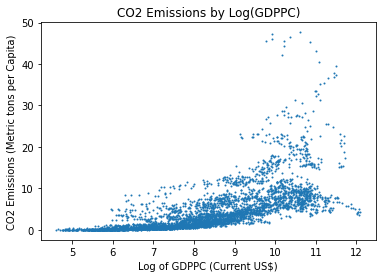

In [123]:
# Graph a scatterplot of Log(GDPPC) and CO2
plt.scatter(df_analysis['Log(GDPPC)'], df_analysis['CO2 Emissions (Metric Tons per Capita)'], s= 1)
plt.title('CO2 Emissions by Log(GDPPC)')
plt.xlabel('Log of GDPPC (Current US$)')
plt.ylabel('CO2 Emissions (Metric tons per Capita)')

Text(0, 0.5, 'CO2 Emissions (Metric tons per Capita)')

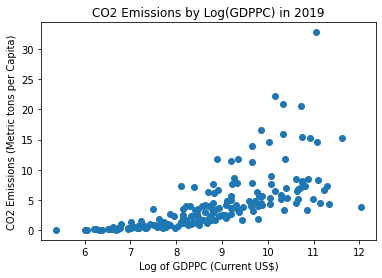

In [124]:
# Graph a scatterplot of Log(GDPPC) and CO2 for 2019
df_2019 = df_analysis[df_analysis.Year == 2019]
plt.scatter(df_2019['Log(GDPPC)'], df_2019['CO2 Emissions (Metric Tons per Capita)'])
plt.title('CO2 Emissions by Log(GDPPC) in 2019')
plt.xlabel('Log of GDPPC (Current US$)')
plt.ylabel('CO2 Emissions (Metric tons per Capita)')

In [120]:
# Create new categorical variable to determine if country is Developed or Developing. HDI of greater than 0.55 is developed, HDI of less than or equal to 0.55 is developing.
conditions = [
    (df_analysis['HDI'] > 0.55),
    (df_analysis['HDI'] <= 0.55)
]

values = ['Developed', 'Developing']

df_analysis['Category'] = np.select(conditions, values)

Text(0, 0.5, 'CO2 Emissions (Metric tons per Capita)')

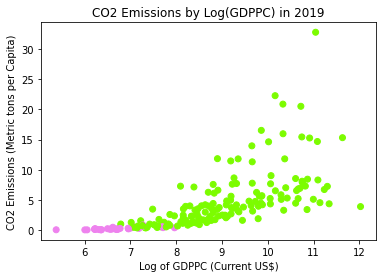

In [125]:
# Graph of scatterplot of Log(GDP) and CO2 for 2019 between Developed and Developing Countries
df_2019 = df_analysis[df_analysis.Year == 2019]

colors = {'Developed':'lawngreen', 'Developing':'violet'}

plt.scatter(df_2019['Log(GDPPC)'], df_2019['CO2 Emissions (Metric Tons per Capita)'], c=df_2019['Category'].map(colors))
plt.title('CO2 Emissions by Log(GDPPC) in 2019')
plt.xlabel('Log of GDPPC (Current US$)')
plt.ylabel('CO2 Emissions (Metric tons per Capita)')

In [126]:
# See the number of developed vs developing countries in the dataset in 2019
df_2019.groupby('Category')['Country Code'].size()

Category
Developed     155
Developing     31
Name: Country Code, dtype: int64

Text(0, 0.5, 'CO2 Emissions (Metric tons per Capita)')

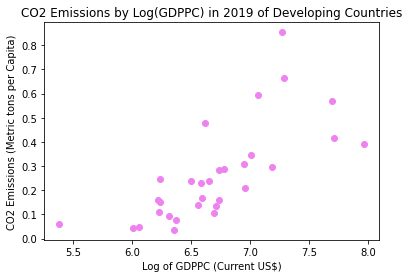

In [127]:
# Scatterplot of developing countries
df_2019_developing = df_analysis[(df_analysis.Year == 2019) & (df_analysis.Category == 'Developing')]

plt.scatter(df_2019_developing['Log(GDPPC)'], df_2019_developing['CO2 Emissions (Metric Tons per Capita)'], c='violet')
plt.title('CO2 Emissions by Log(GDPPC) in 2019 of Developing Countries')
plt.xlabel('Log of GDPPC (Current US$)')
plt.ylabel('CO2 Emissions (Metric tons per Capita)')

Text(0, 0.5, 'CO2 Emissions (Metric tons per Capita)')

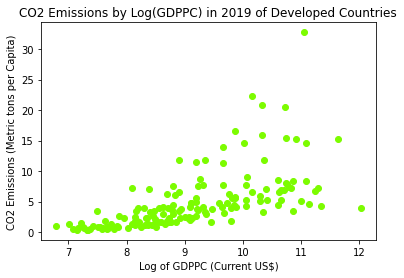

In [130]:
# Scatterplot of developing countries
df_2019_develop = df_analysis[(df_analysis.Year == 2019) & (df_analysis.Category == 'Developed')]

plt.scatter(df_2019_develop['Log(GDPPC)'], df_2019_develop['CO2 Emissions (Metric Tons per Capita)'], c='lawngreen')
plt.title('CO2 Emissions by Log(GDPPC) in 2019 of Developed Countries')
plt.xlabel('Log of GDPPC (Current US$)')
plt.ylabel('CO2 Emissions (Metric tons per Capita)')

In [129]:
# Simple Linear Regression of dataset
df_analysis = df_analysis.dropna()
X = df_analysis['Log(GDPPC)']
y = df_analysis['CO2 Emissions (Metric Tons per Capita)']

X_sm = sm.add_constant(X)

lr = sm.OLS(y, X_sm).fit()

lr.params, lr.summary()

(const        -15.213791
 Log(GDPPC)     2.371577
 dtype: float64, <class 'statsmodels.iolib.summary.Summary'>
 """
                                       OLS Regression Results                                      
 Dep. Variable:     CO2 Emissions (Metric Tons per Capita)   R-squared:                       0.446
 Model:                                                OLS   Adj. R-squared:                  0.446
 Method:                                     Least Squares   F-statistic:                     3456.
 Date:                                    Thu, 09 Feb 2023   Prob (F-statistic):               0.00
 Time:                                            02:58:44   Log-Likelihood:                -12146.
 No. Observations:                                    4287   AIC:                         2.430e+04
 Df Residuals:                                        4285   BIC:                         2.431e+04
 Df Model:                                               1                          

* N = 4287
* R^2 = 0.446
* CO2 = -15.213791 + 2.371577 * Log(GDPPC)





In [115]:
# Simple Linear Regression of 2019 data
df_2019 = df_2019.dropna()
X = df_2019['Log(GDPPC)']
y = df_2019['CO2 Emissions (Metric Tons per Capita)']

X_sm = sm.add_constant(X)

lr = sm.OLS(y, X_sm).fit()

lr.params, lr.summary()

(const        -15.514737
 Log(GDPPC)     2.260167
 dtype: float64, <class 'statsmodels.iolib.summary.Summary'>
 """
                                       OLS Regression Results                                      
 Dep. Variable:     CO2 Emissions (Metric Tons per Capita)   R-squared:                       0.447
 Model:                                                OLS   Adj. R-squared:                  0.444
 Method:                                     Least Squares   F-statistic:                     148.5
 Date:                                    Thu, 09 Feb 2023   Prob (F-statistic):           1.99e-25
 Time:                                            02:56:10   Log-Likelihood:                -499.82
 No. Observations:                                     186   AIC:                             1004.
 Df Residuals:                                         184   BIC:                             1010.
 Df Model:                                               1                          



* N = 186
* R^2 = 0.447
* CO2 = -15.514737 + 2.260167 * Log(GDPPC)



In [116]:
# Simple Linear Regression of Developing countries in 2019
df_2019_developing = df_2019_developing.dropna()

X = df_2019_developing['Log(GDPPC)']
y = df_2019_developing['CO2 Emissions (Metric Tons per Capita)']

X_sm = sm.add_constant(X)

lr = sm.OLS(y, X_sm).fit()

lr.params, lr.summary()

(const        -1.480742
 Log(GDPPC)    0.260212
 dtype: float64, <class 'statsmodels.iolib.summary.Summary'>
 """
                                       OLS Regression Results                                      
 Dep. Variable:     CO2 Emissions (Metric Tons per Capita)   R-squared:                       0.508
 Model:                                                OLS   Adj. R-squared:                  0.491
 Method:                                     Least Squares   F-statistic:                     29.91
 Date:                                    Thu, 09 Feb 2023   Prob (F-statistic):           6.90e-06
 Time:                                            02:56:10   Log-Likelihood:                 17.565
 No. Observations:                                      31   AIC:                            -31.13
 Df Residuals:                                          29   BIC:                            -28.26
 Df Model:                                               1                            

* N = 31
* R^2 = 0.508
* CO2 = -1.480742 + 0.260212 * Log(GDPPC)

In [117]:
# Simple Linear Regression of Developed countries in 2019
df_2019_develop = df_2019_develop.dropna()

X = df_2019_develop['Log(GDPPC)']
y = df_2019_develop['CO2 Emissions (Metric Tons per Capita)']

X_sm = sm.add_constant(X)

lr = sm.OLS(y, X_sm).fit()

lr.params, lr.summary()

(const        -18.492927
 Log(GDPPC)     2.572615
 dtype: float64, <class 'statsmodels.iolib.summary.Summary'>
 """
                                       OLS Regression Results                                      
 Dep. Variable:     CO2 Emissions (Metric Tons per Capita)   R-squared:                       0.379
 Model:                                                OLS   Adj. R-squared:                  0.375
 Method:                                     Least Squares   F-statistic:                     93.55
 Date:                                    Thu, 09 Feb 2023   Prob (F-statistic):           1.46e-17
 Time:                                            02:56:10   Log-Likelihood:                -428.24
 No. Observations:                                     155   AIC:                             860.5
 Df Residuals:                                         153   BIC:                             866.6
 Df Model:                                               1                          

* N = 155
* R^2 = 0.379
* CO2 = -18.492927 + 2.572615 * Log(GDPPC)